In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

# Выборка

In [2]:
raw = pd.read_csv('c:/Users/gandh/dev/unv/smoed/me/data/sample.csv')
df = pd.read_csv('c:/Users/gandh/dev/unv/smoed/me/data/main_data.csv')
df.to_csv('data/data1.csv', index=False)
n = len(df)
n

104

In [3]:
df.describe()

,nu,E
count,104.000000,104.000000
mean,453.201923,129.931731
std,53.829537,21.924634
min,320.000000,64.500000
25%,414.750000,115.175000
50%,458.500000,129.850000
75%,493.000000,146.000000
max,576.000000,177.000000


## Распределение

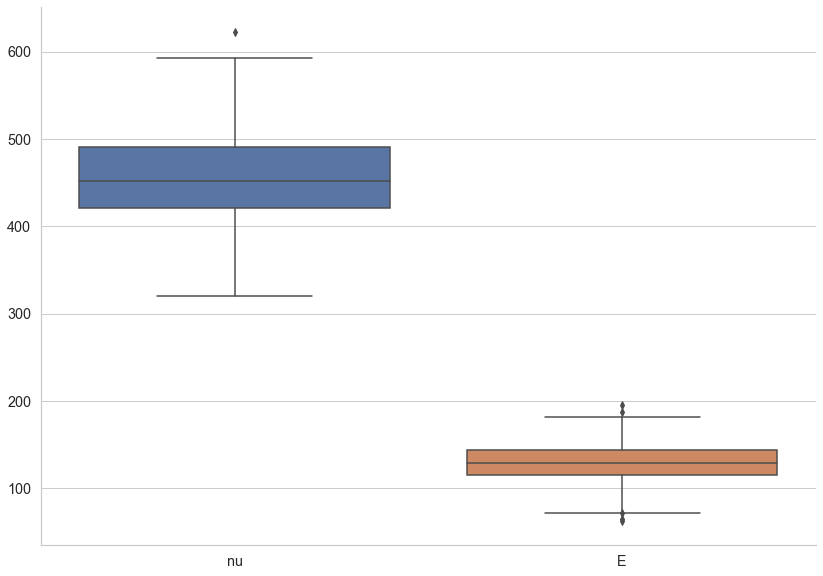

In [4]:
sns.set_theme(style="whitegrid", palette='deep', context='notebook', font_scale=1.3)
ax = sns.catplot(data=raw, kind='box', height=8.27, aspect=11.7/8.27)
plt.savefig('pics/1.png')

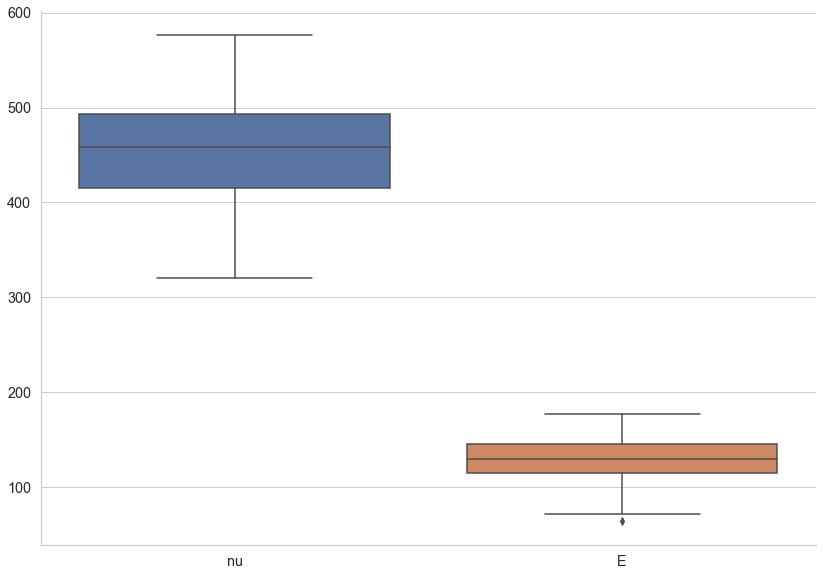

In [5]:
sns.set_theme(style="whitegrid", palette='deep', context='notebook', font_scale=1.3)
ax = sns.catplot(data=df, kind='box', height=8.27, aspect=11.7/8.27)
plt.savefig('pics/2.png')

# Переменная $nu$

## Одна переменная

In [6]:
df2 = df.drop('E', axis=1)
df2.to_csv('data/data2.csv', index=False)
df2.head()

,nu
0,460
1,525
2,503
3,482
4,470


## Ранжированный ряд

In [7]:
df2 = df2.sort_values(by=['nu'], ignore_index = True)
df2.to_csv('data/data3.csv', index=False)
df2.head()

,nu
0,320
1,331
2,345
3,351
4,352


In [8]:
df2.min()
df2.max()

nu    320
dtype: int64

nu    576
dtype: int64

In [9]:
X = df2['nu']

## Вариационный ряд

In [10]:
table_af = X.value_counts().sort_index()
table_rf = X.value_counts(normalize=True).sort_index()
table_af = pd.DataFrame({'nu': table_af.index, 'af': table_af.values})
table_rf = pd.DataFrame({'nu': table_rf.index, 'rf': table_rf.values})
table_rf2 = table_rf.copy()
table_rf2['rf'] = np.round(table_rf2['rf'], 4)
table_af.to_csv('data/data4.csv', index=False)
table_rf2.to_csv('data/data5.csv', index=False)

## Интервальный ряд

In [11]:
k = 1+3.31*np.log10(n)
k = int(np.floor(k))
k

7

In [12]:
min(X)
max(X)

320

576

In [13]:
h = (max(X)-min(X))/k
h = int(np.ceil(h))
h

37

In [14]:
data_interval = pd.concat([table_af, table_rf], ignore_index=True, axis=1).drop(2, axis=1)
data_interval.columns = ['nu', 'af', 'rf']
data_interval.to_csv('data/data6.csv', index=False)

In [15]:
ivs = np.hstack((np.arange(min(X), max(X), h), np.array(max(X))))
ivs

array([320, 357, 394, 431, 468, 505, 542, 576])

In [16]:
data_interval['inter'] = pd.cut(data_interval['nu'], bins=ivs, 
                                right=False)
data_interval.iloc[83, 3] = data_interval.iloc[82, 3]
data_interval['inter'].value_counts().sort_index()

[320, 357)     5
[357, 394)     7
[394, 431)    21
[431, 468)    17
[468, 505)    19
[505, 542)    11
[542, 576)     4
Name: inter, dtype: int64

In [17]:
f_inter = data_interval.groupby(['inter'])[['af', 'rf']].apply(sum).reset_index()
f_inter['avg_inter'] = np.array([np.mean([ivs[i], ivs[i+1]], axis=0) for i in range(k)])
f_inter = f_inter[['inter', 'avg_inter', 'af', 'rf']]
f_inter['af'] = (f_inter['af']).astype(int)
f_inter['rf'] = np.round(f_inter['rf'], 3)
# f_inter.iloc[6, 3] = 0.039
f_inter.to_csv('data/data7.csv', index=False)
f_inter['af'].sum()
f_inter

104

,inter,avg_inter,af,rf
0,"[320, 357)",338.5,5,0.048
1,"[357, 394)",375.5,8,0.077
2,"[394, 431)",412.5,23,0.221
3,"[431, 468)",449.5,25,0.240
4,"[468, 505)",486.5,24,0.231
5,"[505, 542)",523.5,15,0.144
6,"[542, 576)",559.0,4,0.038


## Графики абсолют

### Полигон

Text(0.5, 0.98, 'Полигон для абсолютных частот')

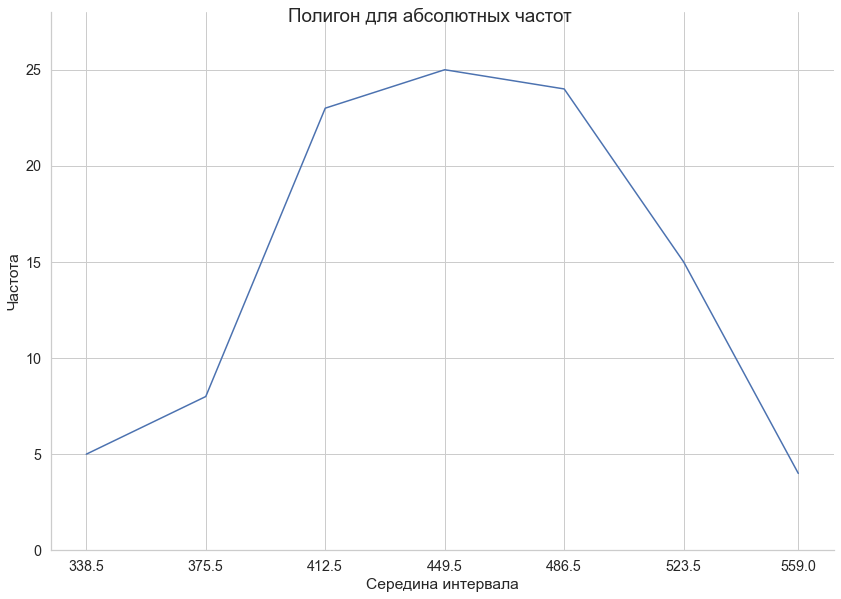

In [18]:
ax = sns.relplot(data=f_inter, x='avg_inter', y='af', kind='line', height=8.27, aspect=11.7/8.27)
ax.set_axis_labels('Середина интервала', 'Частота')
ax.set(ylim=[0,28], xticks=f_inter['avg_inter'])
ax.fig.suptitle('Полигон для абсолютных частот')
plt.savefig('pics/3.png')

### Гист

#### Только ось ординат

Text(0.5, 0.98, 'Гистограмма для абсолютных частот')

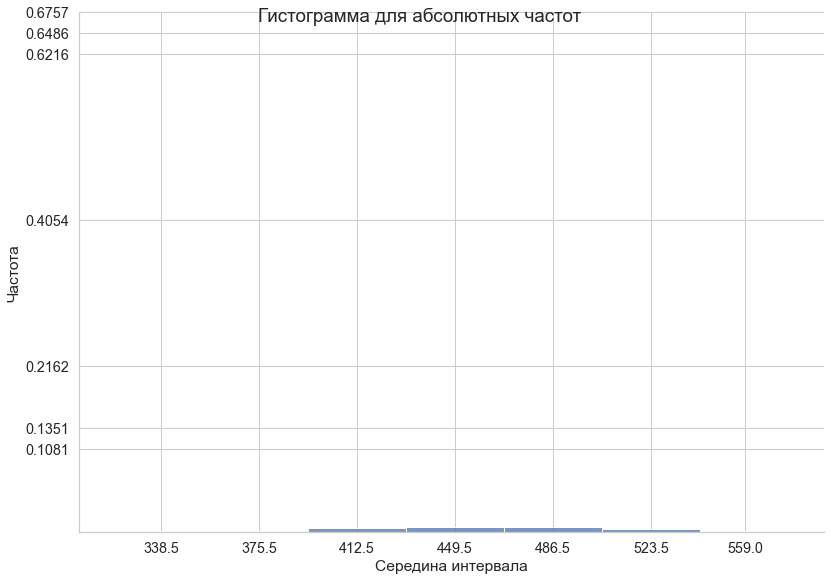

In [19]:
ax = sns.displot(data=df, x='nu', bins=ivs, kind='hist', height=8.27, aspect=11.7/8.27, stat='density')
ax.set_axis_labels('Середина интервала', 'Частота')
ax.set(xticks=f_inter['avg_inter'], yticks=f_inter['af']/h)
ax.fig.suptitle('Гистограмма для абсолютных частот')
plt.savefig('pics/4_o.png')

#### График

Text(0.5, 0.98, 'Гистограмма для абсолютных частот')

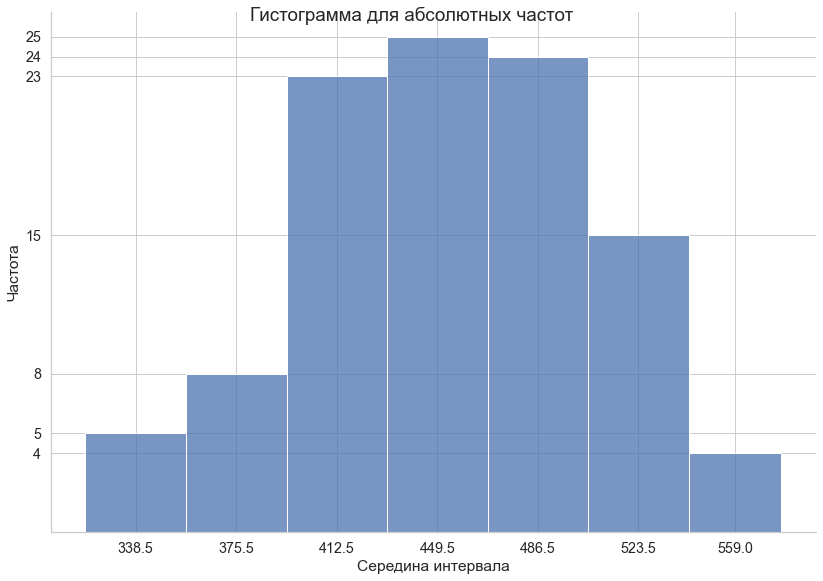

In [20]:
ax = sns.displot(data=df, x='nu', bins=ivs, kind='hist', height=8.27, aspect=11.7/8.27)
ax.set_axis_labels('Середина интервала', 'Частота')
ax.set(xticks=f_inter['avg_inter'], yticks=f_inter['af'])
ax.fig.suptitle('Гистограмма для абсолютных частот')
plt.savefig('pics/4.png')

## Графики относительно

### ecdf

In [21]:
f_inter['sum_rf'] = f_inter['rf'].cumsum()
f_inter

,inter,avg_inter,af,rf,sum_rf
0,"[320, 357)",338.5,5,0.048,0.048
1,"[357, 394)",375.5,8,0.077,0.125
2,"[394, 431)",412.5,23,0.221,0.346
3,"[431, 468)",449.5,25,0.240,0.586
4,"[468, 505)",486.5,24,0.231,0.817
5,"[505, 542)",523.5,15,0.144,0.961
6,"[542, 576)",559.0,4,0.038,0.999


Text(375.5, 0.048, '')

Text(412.5, 0.125, '')

Text(449.5, 0.346, '')

Text(486.5, 0.586, '')

Text(523.5, 0.817, '')

Text(559.0, 0.961, '')

Text(596, 1, '')

Text(0.5, 0.98, 'Эмпирическая фукнция распределения')

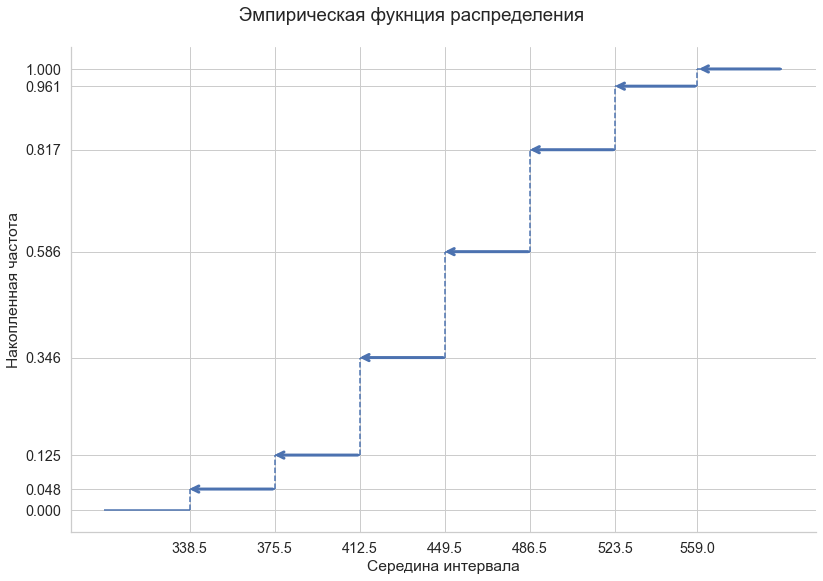

In [22]:
ax = sns.relplot(data=f_inter, x='avg_inter', y='sum_rf', s=0,
                 kind='scatter', height=8.27, aspect=11.7/8.27, color='b')
for i in range(6):
    plt.hlines(f_inter['sum_rf'][i], f_inter['avg_inter'][i], f_inter['avg_inter'][i+1], color='b')
plt.hlines(1, 559, 559+h, color='b')
plt.hlines(0, 338.5-h, 338.5, color='b')
for i in range(6):
    plt.vlines(f_inter['avg_inter'][i+1], f_inter['sum_rf'][i], f_inter['sum_rf'][i+1], color='b', linestyle='--')
plt.vlines(338.5, 0, 0.048, color='b', linestyle='--')

for i in range(6):
    plt.annotate('', xy=(f_inter['avg_inter'][i]-1, f_inter['sum_rf'][i]), 
                 xytext=(f_inter['avg_inter'][i+1], f_inter['sum_rf'][i]), 
                 arrowprops=dict(arrowstyle="->", color='b', linewidth=3))
plt.annotate('', xy=(559, 1), 
                 xytext=(559+h, 1), 
                 arrowprops=dict(arrowstyle="->", color='b', linewidth=3))

ax.set_axis_labels('Середина интервала', 'Накопленная частота')
ax.set(xticks=f_inter['avg_inter'], yticks=[0]+f_inter['sum_rf'][:-1].to_list()+[1])
ax.fig.suptitle('Эмпирическая фукнция распределения')
plt.tight_layout()
plt.savefig('pics/5.png')

### Полигон

Text(0.5, 0.98, 'Полигон для относительных частот')

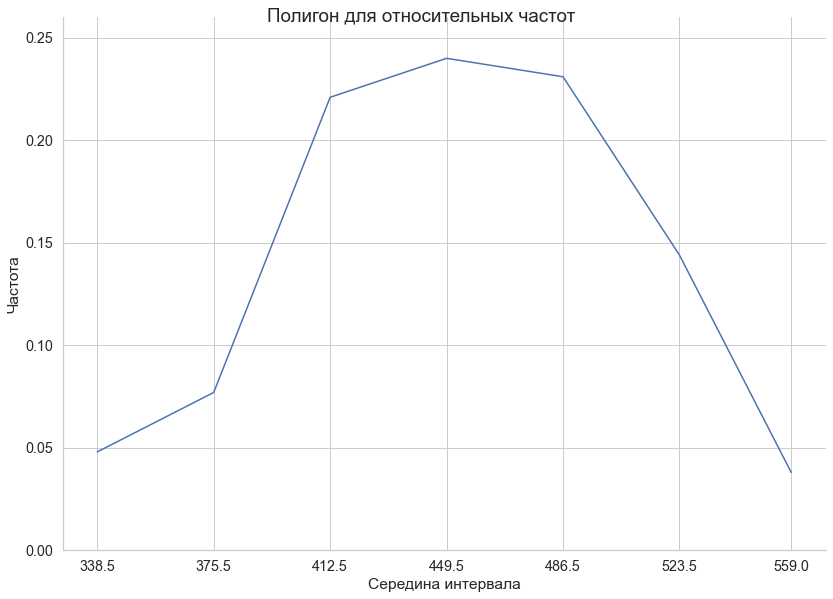

In [23]:
ax = sns.relplot(data=f_inter, x='avg_inter', y='rf', kind='line', height=8.27, aspect=11.7/8.27)
ax.set_axis_labels('Середина интервала', 'Частота')
ax.set(ylim=[0,0.26], xticks=f_inter['avg_inter'])
ax.fig.suptitle('Полигон для относительных частот')
plt.savefig('pics/6.png')

### Гист

Text(0.5, 0.98, 'Гистограмма для относительных частот')

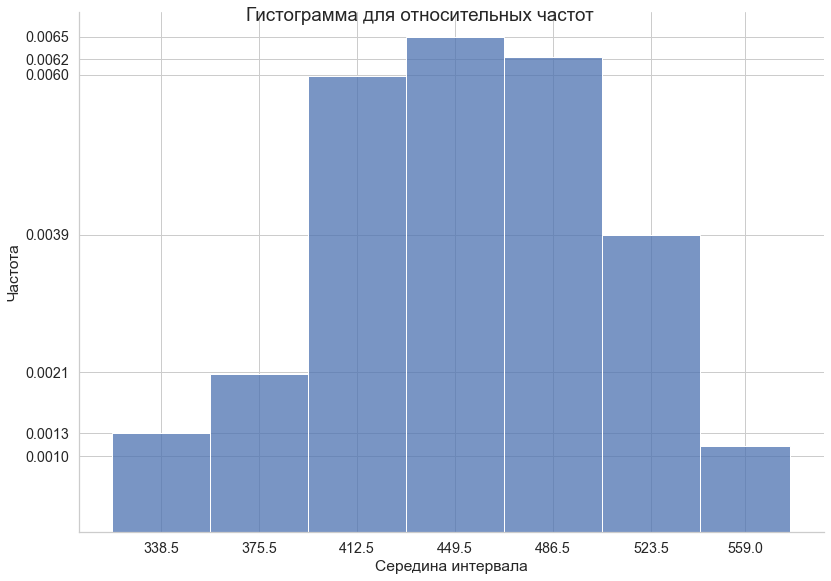

In [24]:
ax = sns.displot(data=df, x='nu', bins=ivs, kind='hist', height=8.27, aspect=11.7/8.27, stat='density')
ax.set_axis_labels('Середина интервала', 'Частота')
ax.set(xticks=f_inter['avg_inter'], yticks=round((f_inter['rf']/h), 4))
ax.fig.suptitle('Гистограмма для относительных частот')
plt.savefig('pics/7.png')

# Переменная $E$

## Одна переменная

In [25]:
df2 = df.drop('nu', axis=1)
df2.to_csv('data2/data2.csv', index=False)
df2.head()

,E
0,124.5
1,148.3
2,146.6
3,148.2
4,124.0


## Ранжированный ряд

In [26]:
df2 = df2.sort_values(by=['E'], ignore_index = True)
df2.to_csv('data2/data3.csv', index=False)
df2.head()

,E
0,64.5
1,71.9
2,81.7
3,84.6
4,87.7


In [27]:
df2.min()
df2.max()

E    64.5
dtype: float64

E    177.0
dtype: float64

In [28]:
X = df2['E']

## Вариационный ряд

In [29]:
table_af0 = X.value_counts().sort_index()
table_rf0 = X.value_counts(normalize=True).sort_index()
table_af = pd.DataFrame({'E': table_af0.index, 'af': table_af0.values})
table_rf = pd.DataFrame({'E': table_rf0.index, 'rf': table_rf0.values})
table_rf2 = table_rf.copy()
table_rf2['rf'] = np.round(table_rf2['rf'], 4)
table_af.to_csv('data2/data4.csv', index=False)
table_rf2.to_csv('data2/data5.csv', index=False)

## Интервальный ряд

In [30]:
k = 1+3.31*np.log10(n)
k = int(np.floor(k))
k

7

In [31]:
min(X)
max(X)

64.5

177.0

In [32]:
h = (max(X)-min(X))/k
h
h = int(np.ceil(h))
# h += 1
h = 16.1
h

16.071428571428573

16.1

In [33]:
data_interval = pd.concat([table_af, table_rf], ignore_index=True, axis=1).drop(2, axis=1)
data_interval.columns = ['E', 'af', 'rf']
data_interval.to_csv('data2/data6.csv', index=False)

In [34]:
ivs = np.hstack((np.arange(min(X), max(X), h), np.array(max(X))))
ivs

array([ 64.5,  80.6,  96.7, 112.8, 128.9, 145. , 161.1, 177. ])

In [35]:
data_interval['inter'] = pd.cut(data_interval['E'], bins=ivs, 
                                right=False)
data_interval.iloc[95, 3] = data_interval.iloc[94, 3]
data_interval['inter'].value_counts().sort_index()

[64.5, 80.6)       2
[80.6, 96.7)       5
[96.7, 112.8)     14
[112.8, 128.9)    25
[128.9, 145.0)    24
[145.0, 161.1)    19
[161.1, 177.0)     7
Name: inter, dtype: int64

In [36]:
f_inter = data_interval.groupby(['inter'])[['af', 'rf']].apply(sum).reset_index()
f_inter['avg_inter'] = np.array([np.mean([ivs[i], ivs[i+1]], axis=0) for i in range(k)])
f_inter = f_inter[['inter', 'avg_inter', 'af', 'rf']]
f_inter['af'] = (f_inter['af']).astype(int)
f_inter['rf'] = np.round(f_inter['rf'], 3)
f_inter.to_csv('data2/data7.csv', index=False)
f_inter
f_inter['af'].sum()
f_inter['rf'].sum()

,inter,avg_inter,af,rf
0,"[64.5, 80.6)",72.55,2,0.019
1,"[80.6, 96.7)",88.65,5,0.048
2,"[96.7, 112.8)",104.75,15,0.144
3,"[112.8, 128.9)",120.85,27,0.260
4,"[128.9, 145.0)",136.95,27,0.260
5,"[145.0, 161.1)",153.05,21,0.202
6,"[161.1, 177.0)",169.05,7,0.067


104

1.0

## Графики абсолют

### Полигон

Text(0.5, 0.98, 'Полигон для абсолютных частот')

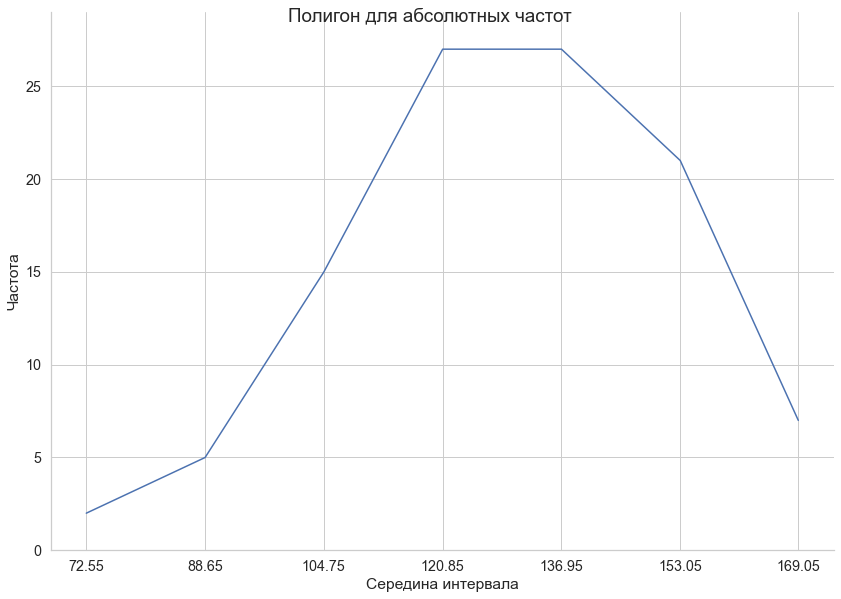

In [37]:
ax = sns.relplot(data=f_inter, x='avg_inter', y='af', kind='line', height=8.27, aspect=11.7/8.27)
ax.set_axis_labels('Середина интервала', 'Частота')
ax.set(ylim=[0,29], xticks=f_inter['avg_inter'])
ax.fig.suptitle('Полигон для абсолютных частот')
plt.savefig('pics2/3.png')

### Гист

#### Только ось ординат

In [38]:
h*(1.677+1.304+0.932+1.677+0.435+0.311+0.124)

104.006

Text(0.5, 0.98, 'Гистограмма для абсолютных частот')

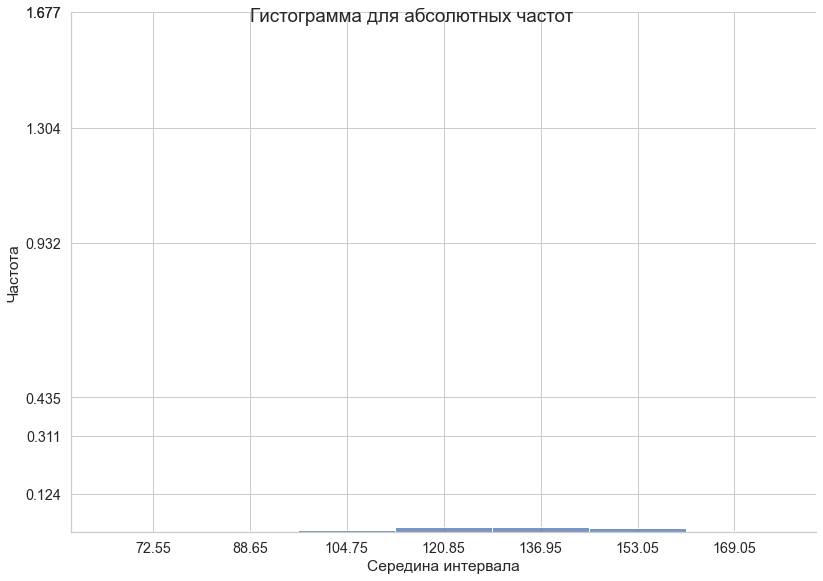

In [39]:
ax = sns.displot(data=df, x='E', bins=ivs, kind='hist', height=8.27, aspect=11.7/8.27, stat='density')
ax.set_axis_labels('Середина интервала', 'Частота')
ax.set(xticks=f_inter['avg_inter'], yticks=f_inter['af']/h)
ax.fig.suptitle('Гистограмма для абсолютных частот')
plt.savefig('pics2/4o.png')

#### График

Text(0.5, 0.98, 'Гистограмма для абсолютных частот')

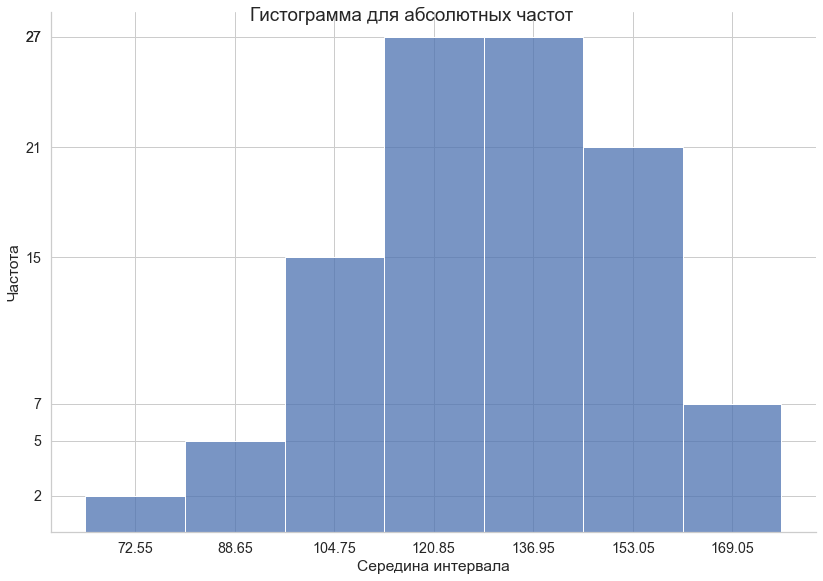

In [40]:
ax = sns.displot(data=df, x='E', bins=ivs, kind='hist', height=8.27, aspect=11.7/8.27)
ax.set_axis_labels('Середина интервала', 'Частота')
ax.set(xticks=f_inter['avg_inter'], yticks=f_inter['af'])
ax.fig.suptitle('Гистограмма для абсолютных частот')
plt.savefig('pics2/4.png')

## Графики относительно

### ecdf

In [41]:
f_inter['sum_rf'] = f_inter['rf'].cumsum()
f_inter

,inter,avg_inter,af,rf,sum_rf
0,"[64.5, 80.6)",72.55,2,0.019,0.019
1,"[80.6, 96.7)",88.65,5,0.048,0.067
2,"[96.7, 112.8)",104.75,15,0.144,0.211
3,"[112.8, 128.9)",120.85,27,0.260,0.471
4,"[128.9, 145.0)",136.95,27,0.260,0.731
5,"[145.0, 161.1)",153.05,21,0.202,0.933
6,"[161.1, 177.0)",169.05,7,0.067,1.000


Text(88.64999999999999, 0.019, '')

Text(104.74999999999999, 0.067, '')

Text(120.84999999999998, 0.211, '')

Text(136.95, 0.471, '')

Text(153.04999999999995, 0.731, '')

Text(169.04999999999998, 0.933, '')

Text(185.15, 1, '')

Text(0.5, 0.98, 'Эмпирическая фукнция распределения')

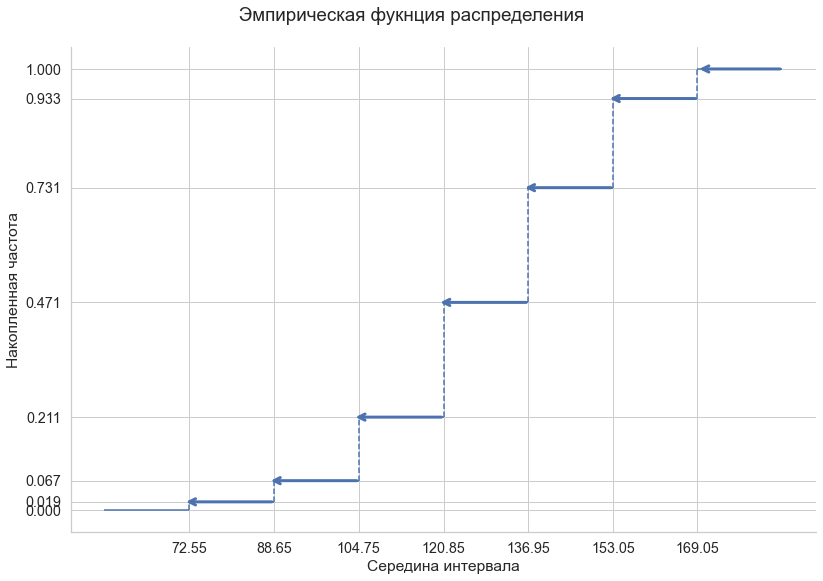

In [42]:
ax = sns.relplot(data=f_inter, x='avg_inter', y='sum_rf', s=0,
                 kind='scatter', height=8.27, aspect=11.7/8.27, color='b')
for i in range(6):
    plt.hlines(f_inter['sum_rf'][i], f_inter['avg_inter'][i], f_inter['avg_inter'][i+1], color='b')
plt.hlines(1, 169.05, 169.05+h, color='b')
plt.hlines(0, 72.55-h, 72.55, color='b')
for i in range(6):
    plt.vlines(f_inter['avg_inter'][i+1], f_inter['sum_rf'][i], f_inter['sum_rf'][i+1], color='b', linestyle='--')
plt.vlines(72.55, 0, 0.019, color='b', linestyle='--')

for i in range(6):
    plt.annotate('', xy=(f_inter['avg_inter'][i]-1, f_inter['sum_rf'][i]), 
                 xytext=(f_inter['avg_inter'][i+1], f_inter['sum_rf'][i]), 
                 arrowprops=dict(arrowstyle="->", color='b', linewidth=3))
plt.annotate('', xy=(169.05, 1), 
                 xytext=(169.05+h, 1), 
                 arrowprops=dict(arrowstyle="->", color='b', linewidth=3))

ax.set_axis_labels('Середина интервала', 'Накопленная частота')
ax.set(xticks=f_inter['avg_inter'], yticks=[0]+f_inter['sum_rf'][:-1].to_list()+[1])
ax.fig.suptitle('Эмпирическая фукнция распределения')
plt.tight_layout()
plt.savefig('pics2/5.png')

### Полигон

Text(0.5, 0.98, 'Полигон для относительных частот')

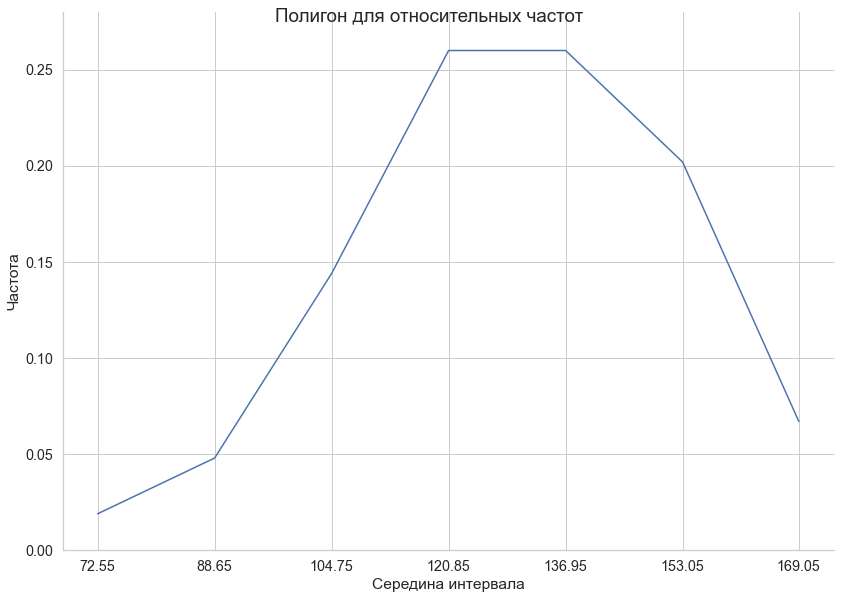

In [43]:
ax = sns.relplot(data=f_inter, x='avg_inter', y='rf', kind='line', height=8.27, aspect=11.7/8.27)
ax.set_axis_labels('Середина интервала', 'Частота')
ax.set(ylim=[0,0.28], xticks=f_inter['avg_inter'])
ax.fig.suptitle('Полигон для относительных частот')
plt.savefig('pics2/6.png')

### Гист

In [44]:
h*(0.0161+0.0161+0.0125+0.0089+0.0042+0.0030+0.0012)

0.9982000000000002

Text(0.5, 0.98, 'Гистограмма для относительных частот')

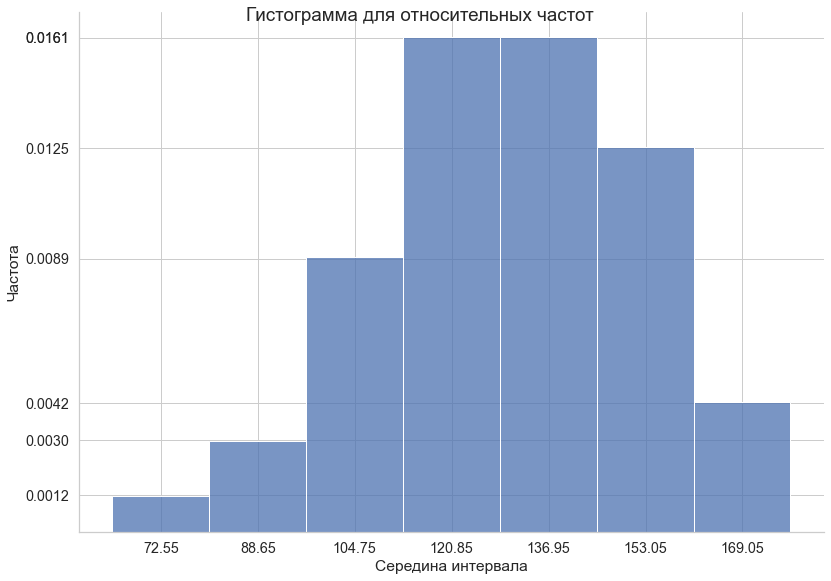

In [45]:
ax = sns.displot(data=df, x='E', bins=ivs, kind='hist', height=8.27, aspect=11.7/8.27, stat='density')
ax.set_axis_labels('Середина интервала', 'Частота')
ax.set(xticks=f_inter['avg_inter'], yticks=round((f_inter['rf']/h), 4))
ax.fig.suptitle('Гистограмма для относительных частот')
plt.savefig('pics2/7.png')